<ipython-input-1-147282d2ad6f>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Date
2020-07-01    4665433
2020-07-02    4585028
2020-07-03    4671221
2020-07-04    4664489
2020-07-05    4725279
Name: Infected, dtype: int64


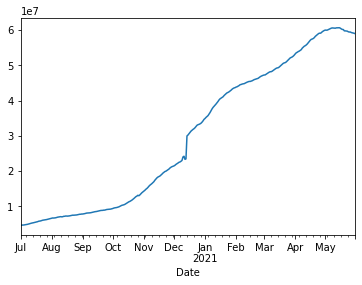

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('202'+x, '%Y-%m-%d')
 
series = read_csv('https://raw.githubusercontent.com/ll-cooool-j/DS-Assignment/main/Datasets/Datasets%20for%20ARIMA%20(Only%20Date%20%2B%20Infected)/Global%20(Date%20%2B%20Infected)%20(SPSS).csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

In [3]:
series.max()

60675274

In [4]:
series.min()

4585028

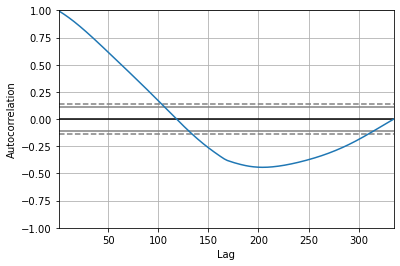

In [5]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
pyplot.show()

In [ ]:
# grid search ARIMA parameters for time series
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train_size= int(len(X) * 0.2)
  point = int(len(X) * 0.8)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

                             ARIMA Model Results                              
Dep. Variable:             D.Infected   No. Observations:                  334
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4762.326
Method:                           css   S.D. of innovations         376819.820
Date:                Fri, 09 Jul 2021   AIC                           9528.652
Time:                        09:09:56   BIC                           9536.274
Sample:                             1   HQIC                          9531.691
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.624e+05   2.06e+04      7.876      0.000    1.22e+05    2.03e+05


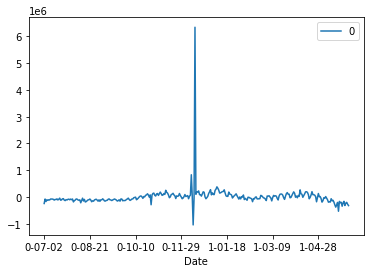

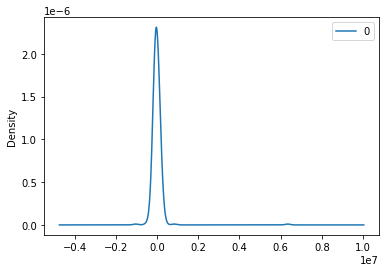

                  0
count  3.340000e+02
mean   1.387224e-10
std    3.773852e+05
min   -1.042911e+06
25%   -1.043764e+05
50%   -3.054590e+04
75%    7.397610e+04
max    6.343331e+06


In [10]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame

# fit model
series = series.astype('float64')
model = ARIMA(series, order=(0,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=8111982.030303, expected=51816229.000000
predicted=52519972.223881, expected=52085584.000000
predicted=52782939.161765, expected=52219637.000000
predicted=52908828.362319, expected=52364998.000000
predicted=53046420.357143, expected=52586110.000000
predicted=53261049.112676, expected=52873692.000000
predicted=53543251.152778, expected=53228352.000000
predicted=53893597.465753, expected=53531259.000000
predicted=54191608.000000, expected=53685760.000000
predicted=54339364.360000, expected=53883147.000000
predicted=54530748.500000, expected=54016912.000000
predicted=54657840.298701, expected=54238529.000000
predicted=54874081.512821, expected=54424199.000000
predicted=55054056.797468, expected=54853961.000000
predicted=55481317.600000, expected=55134410.000000
predicted=55757483.790123, expected=55401224.000000
predicted=56019953.158537, expected=55552240.000000
predicted=56165334.060241, expected=55764111.000000
predicted=56372428.595238, expected=56043461.000000
predicted=566

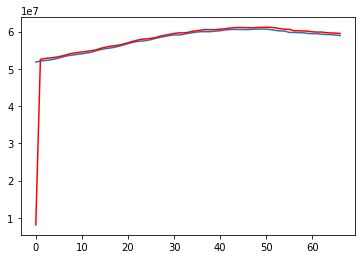

In [16]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')
# prepare training dataset
train_size= int(len(X) * 0.2)
point = int(len(X) * 0.8)
train, test = X[0:train_size], X[point:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()